In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('bench.csv',index_col=0)
df_size = pd.read_csv('graphSize_data.csv',index_col=0)

In [3]:
df_size.head()

,V,E
name,,
nonwheeler2,12,13
nonwheeler3,6,7
nonwheeler4,6,6
nonwheeler5,10,9
nonwheeler6,11,11


In [4]:
df.head()

,naive-order,partition-order,naive,partition
nonwheeler2,0.002221,0.002156,NaN,NaN
nonwheeler3,0.001741,0.001488,0.645436,0.659197
nonwheeler4,0.001800,0.001800,0.586502,0.604752
nonwheeler5,0.004348,0.002047,0.050809,0.037588
nonwheeler6,0.003061,0.002420,NaN,NaN


In [5]:
trie_df = df.loc[df.index.str.contains('trie')]
trie_df.head()

,naive-order,partition-order,naive,partition
trie,NaN,NaN,0.814613,0.704957
trie2,0.00271,0.001415,0.022534,0.020037
trie3,7.47678,0.371760,7.529050,0.522940
trie4,0.47951,0.033987,0.634947,0.070526


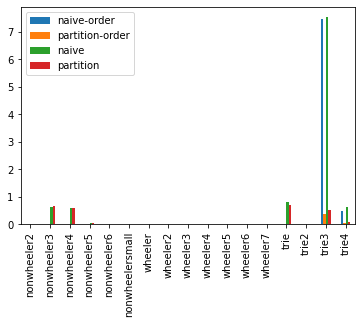

In [6]:
df.plot(kind='bar',rot=90)

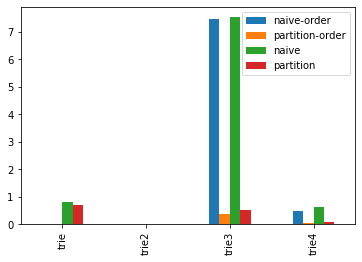

In [7]:
trie_df.plot(kind='bar',rot=90)

In [8]:
#split data into manual and trie and look at order and no order approaches... 
#first, look at manual approach: ordering: 
# so plot all the manual graphs on x-axis with size as variable against their times on y-axis. 

manual_df = df.loc[df.index.str.contains('wheeler')][["naive-order", "partition-order"]]
manual_df = manual_df.iloc[6:]
manual_df_size = df_size.loc[df_size.index.str.contains("wheeler")]
manual_df_size = manual_df_size.iloc[6:]

#manual_df = df[["naive-order", "partition-order"]]
#manual_df_size = df_size

frames = [manual_df, manual_df_size]
result = manual_df.join(manual_df_size, how='outer')
display(result)

,naive-order,partition-order,V,E
wheeler,0.007836,0.003980,8,13
wheeler2,0.001164,0.000884,3,3
wheeler3,0.002502,0.001700,5,4
wheeler4,0.002108,0.001274,6,5
wheeler5,0.005825,0.004171,10,10
wheeler6,0.009165,0.002907,12,12
wheeler7,0.002469,0.001619,6,5


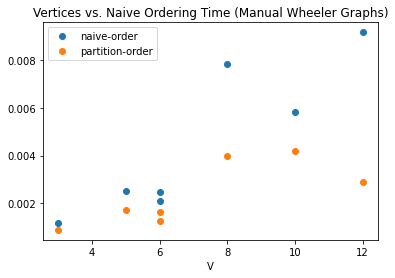

In [9]:
# plot vertices/edges vs. time taken for naive-order or partition-order to run 
result.dropna()
naive_v = result[['V', 'naive-order']]
partition_v = result[['V', 'partition-order']]
ax = naive_v.plot(x='V', y='naive-order', style='o', title='Vertices vs. Naive Ordering Time (Manual Wheeler Graphs)')
partition_v.plot(x='V', y='partition-order', style='o', ax=ax)

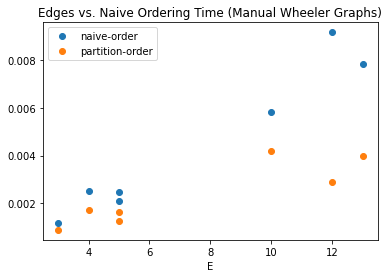

In [10]:
naive_v = result[['E', 'naive-order']]
partition_v = result[['E', 'partition-order']]
ax = naive_v.plot(x='E', y='naive-order', style='o', title='Edges vs. Naive Ordering Time (Manual Wheeler Graphs)')
partition_v.plot(x='E', y='partition-order', style='o', ax=ax)

In [62]:
trie_data1 = df.loc[df.index.str.contains('trie')][["naive-order", "partition-order"]]
trie_data2 = df_size.loc[df_size.index.str.contains("trie")]
result = trie_data1.join(trie_data2, how='outer')
display(result)

,naive-order,partition-order,V,E
trie,NaN,NaN,7,6
trie1,NaN,NaN,397,396
trie2,0.00271,0.001415,7,6
trie3,7.47678,0.371760,397,396
trie4,0.47951,0.033987,104,103


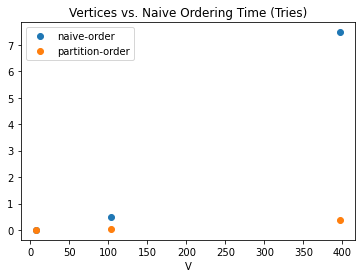

In [63]:
naive_v = result[['V', 'naive-order']]
partition_v = result[['V', 'partition-order']]
ax = naive_v.plot(x='V', y='naive-order', style='o', title='Vertices vs. Naive Ordering Time (Tries)')
partition_v.plot(x='V', y='partition-order', style='o', ax=ax)

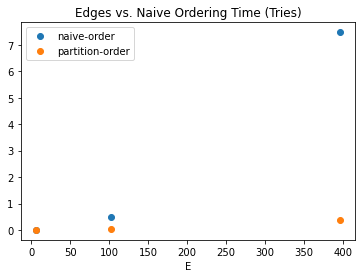

In [64]:
naive_v = result[['E', 'naive-order']]
partition_v = result[['E', 'partition-order']]
ax = naive_v.plot(x='E', y='naive-order', style='o', title='Edges vs. Naive Ordering Time (Tries)')
partition_v.plot(x='E', y='partition-order', style='o', ax=ax)

In [65]:
nonwheel1 = df.loc[df.index.str.contains('non')][["naive-order", "partition-order"]]
nonwheel2 = df_size.loc[df_size.index.str.contains("non")]
result = nonwheel1.join(nonwheel2, how='outer')
display(result)

,naive-order,partition-order,V,E
nonwheeler2,0.002221,0.002156,12,13
nonwheeler3,0.001741,0.001488,6,7
nonwheeler4,0.001800,0.001800,6,6
nonwheeler5,0.004348,0.002047,10,9
nonwheeler6,0.003061,0.002420,11,11
nonwheelersmall,0.001730,0.002414,3,3


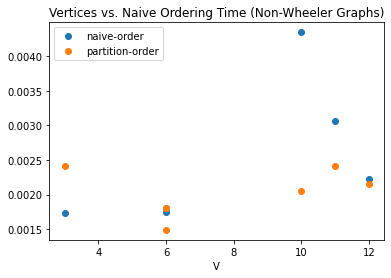

In [66]:
naive_v = result[['V', 'naive-order']]
partition_v = result[['V', 'partition-order']]
ax = naive_v.plot(x='V', y='naive-order', style='o', title='Vertices vs. Naive Ordering Time (Non-Wheeler Graphs)')
partition_v.plot(x='V', y='partition-order', style='o', ax=ax)

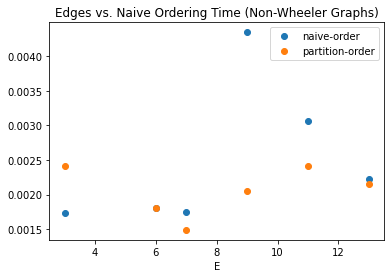

In [68]:
naive_v = result[['E', 'naive-order']]
partition_v = result[['E', 'partition-order']]
ax = naive_v.plot(x='E', y='naive-order', style='o', title='Edges vs. Naive Ordering Time (Non-Wheeler Graphs)')
partition_v.plot(x='E', y='partition-order', style='o', ax=ax)